In [2]:
using StatsPlots
using Plots
using DataFrames
using CSV
using Statistics

In [3]:
function multiple_boxplot(;df, group_var, var_one, var_two, var_three, title_plot)
    max_y = maximum(
        (maximum(df[!, var_one]),
        maximum(df[!, var_two]),
        maximum(df[!, var_three]))
    )
    min_y = minimum(
        (minimum(df[!, var_one]),
        minimum(df[!, var_two]),
        minimum(df[!, var_three]))
    )
    l = @layout [grid(1, 3)]
    # plot 1
    p1 = @df df boxplot(string.(cols(group_var)), cols(var_one), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_one))
    # plot 2
    p2 = @df df boxplot(string.(cols(group_var)), cols(var_two), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_two))
    # plot 3
    p3 = @df df boxplot(string.(cols(group_var)), cols(var_three), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_three))

    all_p = plot(p1, p2, p3, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

In [14]:
function triple_boxplot(;df, var_one, var_two, var_three, title_plot)
    max_y = maximum(
        (maximum(df[!, var_one]),
        maximum(df[!, var_two]),
        maximum(df[!, var_three]))
    )
    min_y = minimum(
        (minimum(df[!, var_one]),
        minimum(df[!, var_two]),
        minimum(df[!, var_three]))
    )
    l = @layout [grid(1, 3)]
    # plot 1
    p1 = boxplot(df[!, var_one], label=false)
    ylims!((min_y, max_y))
    xlabel!(string(var_one))
    # plot 2
    p2 = boxplot(df[!, var_two], label=false)
    ylims!((min_y, max_y))
    xlabel!(string(var_two))
    # plot 3
    p3 = boxplot(df[!, var_three], label=false)
    ylims!((min_y, max_y))
    xlabel!(string(var_three))

    all_p = plot(p1, p2, p3, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

In [20]:
df_metrics = CSV.read("./simulation_n800_p2000.csv", DataFrames.DataFrame);

### False Discovery Rate

#### By correlation

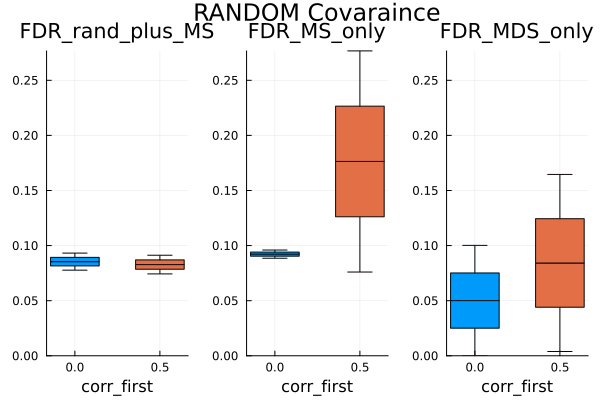

In [29]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="RANDOM Covaraince"
)

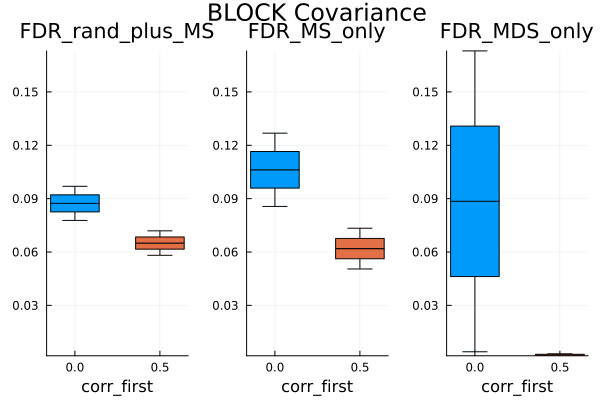

In [30]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="BLOCK Covariance"
)

#### By proportion on non-zero coefficients

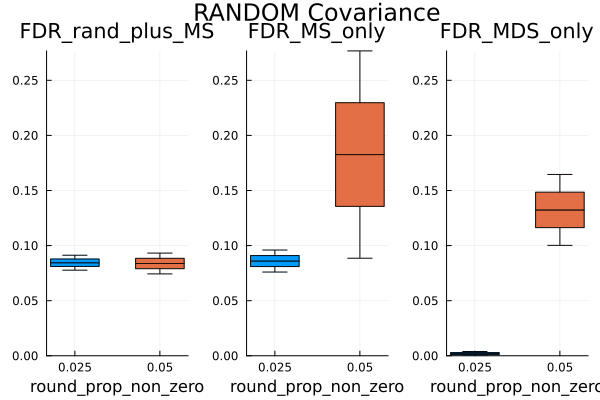

In [32]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="RANDOM Covariance"
)

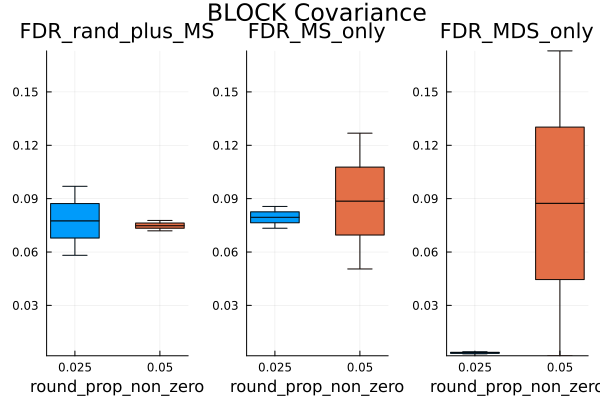

In [33]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="BLOCK Covariance"
)

### True Positive Rate / Power

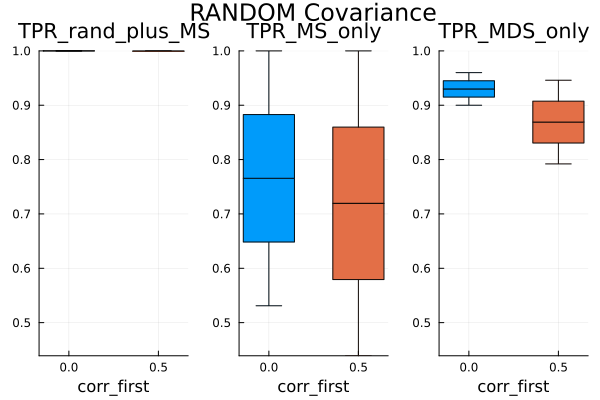

In [36]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="RANDOM Covariance"
)

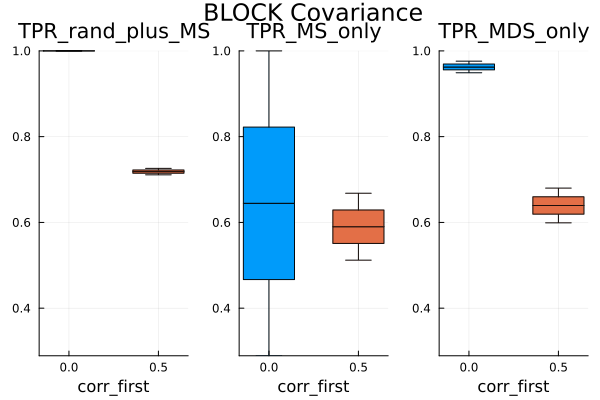

In [37]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="BLOCK Covariance"
)

### OVERALL

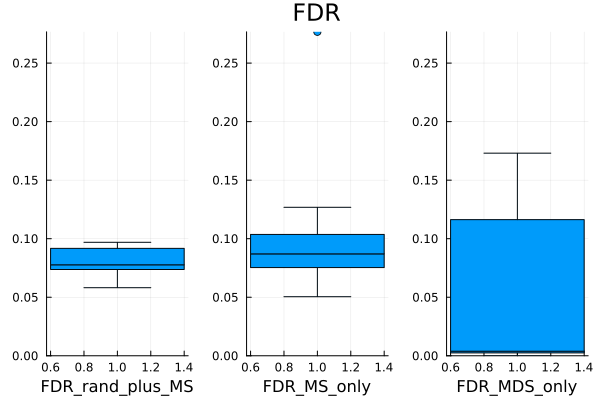

In [39]:
triple_boxplot(df=df_metrics,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="FDR"
)

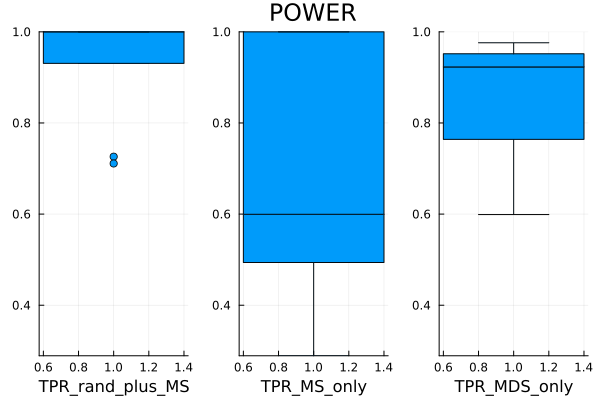

In [40]:
triple_boxplot(df=df_metrics,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="POWER"
)

# Conclusions

Comparison of Single Data Splitting (MS only), Multiple Data Splitting (MDS only) and Randomisation + Mirror Statistic (Rand+MS).  
This second simulation is done following the DS paper, with:
- n=800
- p=2000 (another one is available with p=1000)
- p1=5% and 2.5% of p (prop on non-null coefficients. In the paper they use p1=50)
- MDS replications = 50 (as paper recommended in the paper)

### Key Takeaways:
- MDS only is almost always more conservative than the provided FDR control level (here 10%)
- MS only and Rand+MS achieve the correct FDR control. MDS is lower
- MDS only provides more Power and less variability compared to MS only
- Rand + MS is still better in terms of Power compared with the others, on averege is higher and much less variable 
- The BLOCK diagonal covariance structure is helping in reducing FDR